In [1]:
import sklearn
print(sklearn.__version__)

0.24.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
seed = 1031

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

/workspace1/liufengyuan/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

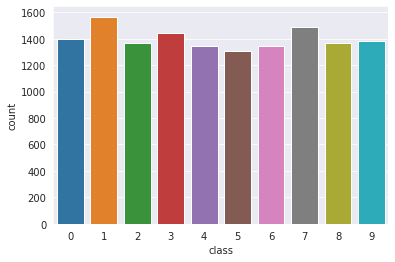

In [ ]:
sns.countplot(y_test)

In [ ]:
# Normalising the data
X_train, X_test = X_train/255.0, X_test/255.0

# Subset on only two numbers 3 and 5
num1, num2 = 3, 5
X_sub_train = X_train[(y_train == num1) | (y_train == num2)]
y_sub_train = y_train[(y_train == num1) | (y_train == num2)]

X_sub_test = X_test[(y_test == num1) | (y_test == num2)]
y_sub_test = y_test[(y_test == num1) | (y_test == num2)]

print('X values')
print('X_train', X_sub_train.shape)
print('X_test', X_sub_test.shape, '\n')
print('y values')
print('y train', y_sub_train.shape)
print('y test', y_sub_test.shape)

X values
X_train (10707, 784)
X_test (2747, 784) 

y values
y train (10707,)
y test (2747,)


In [ ]:
y_sub_train[y_sub_train == num1] = 1
y_sub_train[y_sub_train == num2] = 0
y_sub_test[y_sub_test == num1] = 1
y_sub_test[y_sub_test == num2] = 0

In [ ]:
model = LogisticRegression( max_iter=3 )
model.fit( X_sub_train, y_sub_train )

/workspace1/liufengyuan/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=3)

In [ ]:
prediction = model.predict(X_sub_train)
print(prediction)
print(y_sub_train)
print(accuracy_score(y_sub_train, prediction))

[0 1 1 ... 1 0 0]
62445    0
8039     1
52059    1
44312    1
27975    0
        ..
46566    1
24910    0
53457    1
43670    1
7448     0
Name: class, Length: 10707, dtype: int64
0.8920332492761744


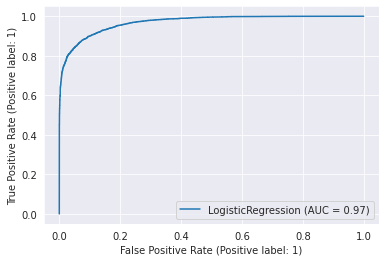

In [ ]:
plot_roc_curve( model, X_sub_train, y_sub_train )

In [ ]:
print( classification_report(y_sub_train, prediction) )
print( confusion_matrix(y_sub_train, prediction))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5008
           1       0.87      0.93      0.90      5699

    accuracy                           0.89     10707
   macro avg       0.90      0.89      0.89     10707
weighted avg       0.89      0.89      0.89     10707

[[4223  785]
 [ 371 5328]]


In [ ]:
prediction_test = model.predict(X_sub_test)
print(prediction_test)
print(y_sub_test)
print(accuracy_score(y_sub_test, prediction_test))

[1 1 1 ... 1 1 1]
49       1
19518    1
5493     1
66862    1
50976    1
        ..
33448    0
32421    1
9078     1
24442    1
47955    0
Name: class, Length: 2747, dtype: int64
0.8904259191845649


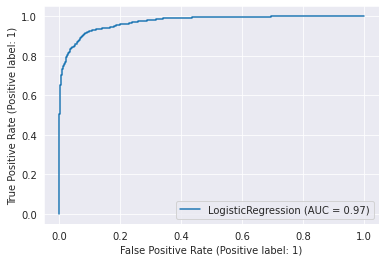

In [ ]:
plot_roc_curve( model, X_sub_test, y_sub_test );

In [ ]:
print( classification_report(y_sub_test, prediction_test) )
print( confusion_matrix(y_sub_test, prediction_test) )

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1305
           1       0.86      0.94      0.90      1442

    accuracy                           0.89      2747
   macro avg       0.90      0.89      0.89      2747
weighted avg       0.89      0.89      0.89      2747

[[1087  218]
 [  83 1359]]


In [ ]:
y_score = model.predict_proba(X_sub_train)[:,1]
print(y_score)

[0.10009328 0.90360198 0.82272043 ... 0.68838142 0.22531637 0.03597235]


In [ ]:
thres = 0.2
prediction_high_recall = (y_score > thres).astype(int)

In [ ]:
print( classification_report(y_sub_train, prediction_high_recall) )
print( confusion_matrix(y_sub_train, prediction_high_recall) )

              precision    recall  f1-score   support

           0       0.99      0.46      0.63      5008
           1       0.68      1.00      0.81      5699

    accuracy                           0.75     10707
   macro avg       0.83      0.73      0.72     10707
weighted avg       0.82      0.75      0.72     10707

[[2299 2709]
 [  17 5682]]


In [ ]:
meta_features = np.hstack((prediction_high_recall.reshape(-1,1),
                           X_sub_train))
meta_labels = prediction_high_recall & y_sub_train

In [ ]:
meta_model = LogisticRegression()
meta_model.fit( meta_features, meta_labels)

/workspace1/liufengyuan/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
meta_prediction = meta_model.predict(meta_features)
final_prediction = meta_prediction & prediction_high_recall

In [ ]:
print( classification_report(y_sub_train, final_prediction) )
print( confusion_matrix(y_sub_train, final_prediction) )

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5008
           1       0.97      0.97      0.97      5699

    accuracy                           0.97     10707
   macro avg       0.97      0.97      0.97     10707
weighted avg       0.97      0.97      0.97     10707

[[4854  154]
 [ 146 5553]]
